In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [21]:
file_path = '/Users/leannkim/Documents/Intro SaaS/Project/Merged_suppliers2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to verify it has been read correctly
print(df.head())

   PurchaseOrderLineID  PurchaseOrderID  StockItemID  OrderedOuters  \
0                  104                7           97             24   
1                   13                2           89              6   
2                   17                2           98              1   
3                   18                2           99             14   
4                   19                2          100             14   

                                 Description_size  \
0  "The Gu" red shirt XML tag t-shirt (Black) 3XL   
1  "The Gu" red shirt XML tag t-shirt (Black) 3XS   
2  "The Gu" red shirt XML tag t-shirt (Black) 4XL   
3  "The Gu" red shirt XML tag t-shirt (Black) 5XL   
4  "The Gu" red shirt XML tag t-shirt (Black) 6XL   

                                  Description Size  ReceivedOuters  \
0  "The Gu" red shirt XML tag t-shirt (Black)  3XL              24   
1  "The Gu" red shirt XML tag t-shirt (Black)  3XS               6   
2  "The Gu" red shirt XML tag t-shirt (Black

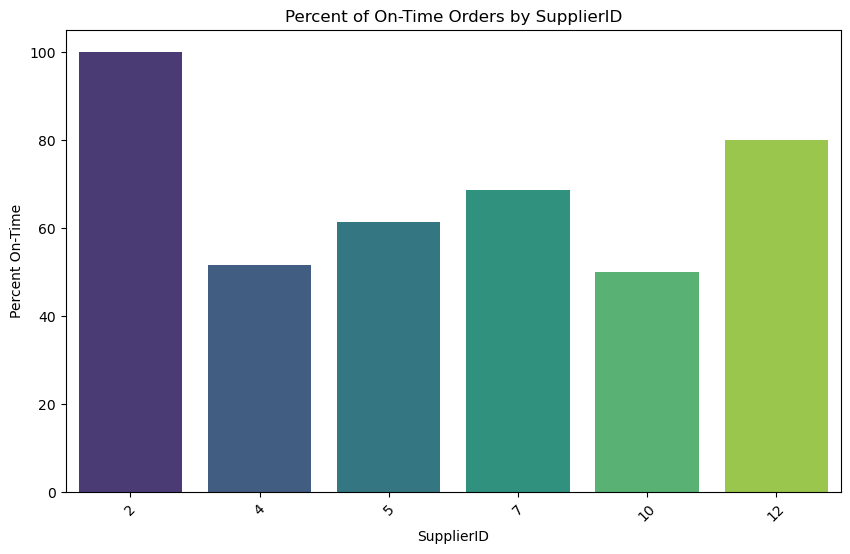

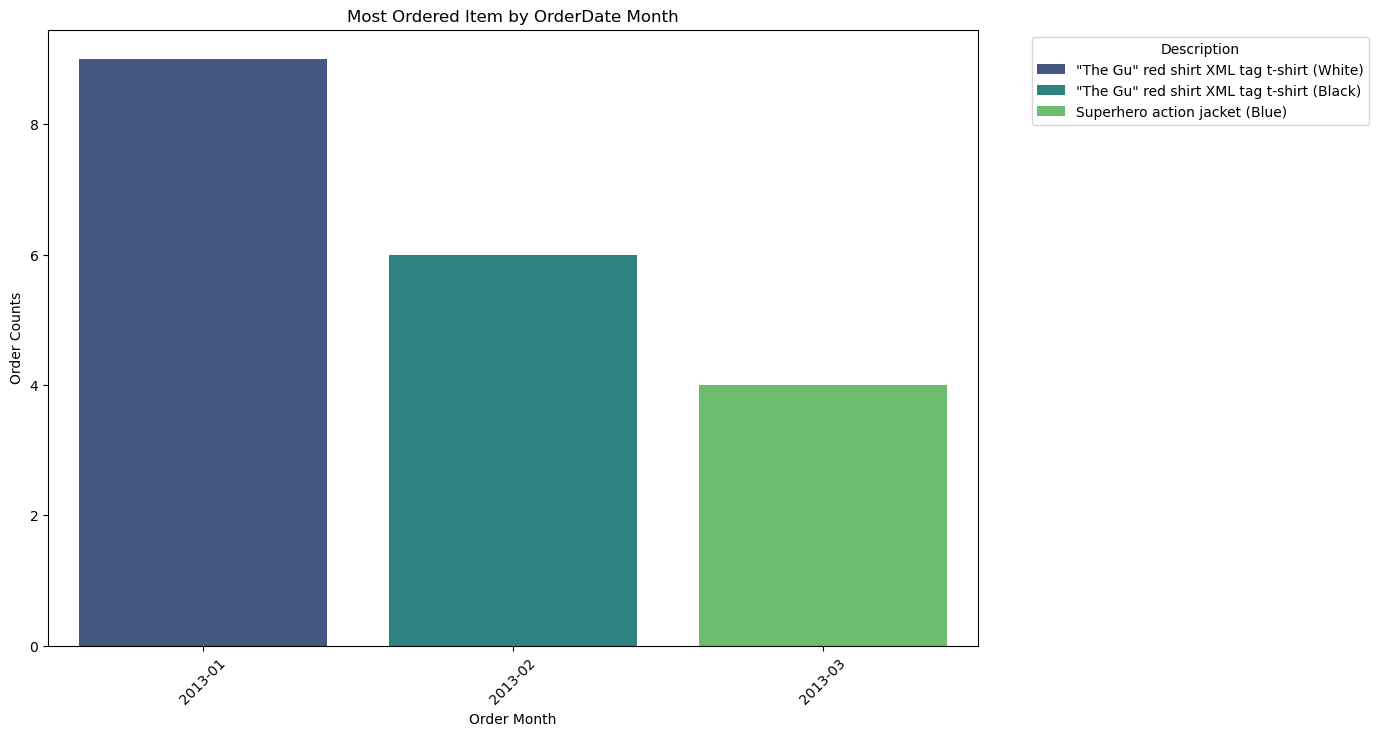

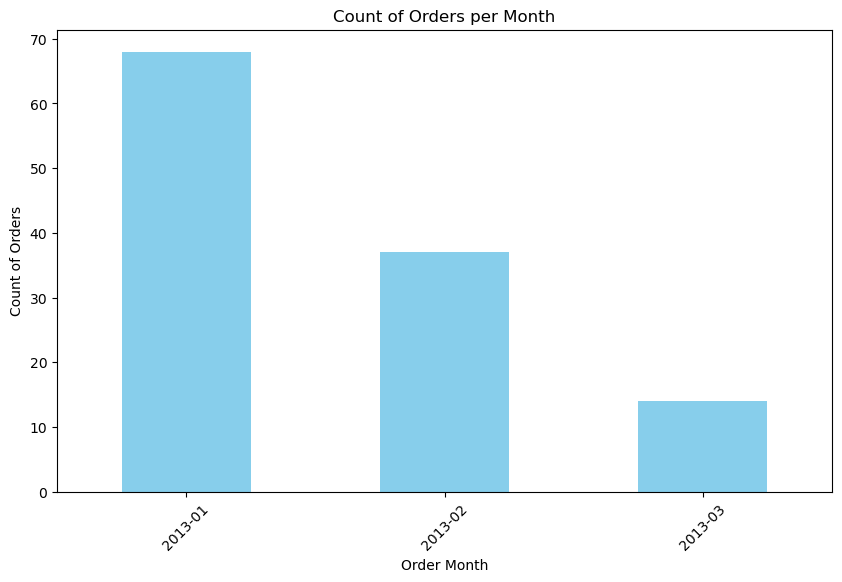

In [22]:
# Convert date columns to datetime objects
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%y')
df['ExpectedDeliveryDate'] = pd.to_datetime(df['ExpectedDeliveryDate'], format='%m/%d/%y')
df['ActualDeliveryDate'] = pd.to_datetime(df['ActualDeliveryDate'], format='%m/%d/%y')

# Calculate whether orders were on time
df['OnTime'] = df['ActualDeliveryDate'] <= df['ExpectedDeliveryDate']

# Calculate the percent of on-time orders by SupplierID
on_time_percent = df.groupby('SupplierID')['OnTime'].mean() * 100

# Plot the percent of on-time orders by SupplierID
plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_percent.index, y=on_time_percent.values, palette='viridis')
plt.title('Percent of On-Time Orders by SupplierID')
plt.xlabel('SupplierID')
plt.ylabel('Percent On-Time')
plt.xticks(rotation=45)
plt.show()

# Extract the month from OrderDate
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')

# Calculate the most ordered item by month
most_ordered_item = df.groupby(['OrderMonth', 'Description']).size().reset_index(name='Counts')
most_ordered_item = most_ordered_item.sort_values(by=['OrderMonth', 'Counts'], ascending=[True, False]).drop_duplicates('OrderMonth')

# Plot the most ordered item by month
plt.figure(figsize=(12, 8))
sns.barplot(x=most_ordered_item['OrderMonth'].astype(str), y=most_ordered_item['Counts'], hue=most_ordered_item['Description'], dodge=False, palette='viridis')
plt.title('Most Ordered Item by OrderDate Month')
plt.xlabel('Order Month')
plt.ylabel('Order Counts')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Calculate the count of orders per month
orders_per_month = df['OrderMonth'].value_counts().sort_index()

# Plot the count of orders per month
plt.figure(figsize=(10, 6))
orders_per_month.plot(kind='bar', color='skyblue')
plt.title('Count of Orders per Month')
plt.xlabel('Order Month')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.show()